# School of Electrical and Information Engineering
### University of the Witwatersrand, Johannesburg
### ELEN4022 — Full Stack Quantum Computing

# Outcome
This is an individual laboratory exercise. You are expected to familiarise yourself, learn and under-stand the use of the following:

1. A basic understanding of circuit simulation in Qiskit
2. A thorough understanding of the basic linear algebraic tools used in Quantum Computing
3. Programming idiomatic Python in a Jupyter environment
4. Reporting findings within your notebook using TeX and Markdown features
5. How to use git with notebooks

# Work Schedule
You are expected to have worked through the Getting Started with Qiskit notebook tutorial and have a basic grasp
of the mathematical representation of Quantum Computation (https://cnot.io/contents/ background and quantum computing
is a good start).

### Problem Description: Simulate the unitary of a CNOT Ring to validate an algebraically calculated result of the same structure.

The CNOT Ring pictured for a 5 qubit system below are a chain of CNOT gates that connect every qubit to its neighbouring
qubit where the last qubit neighbours the first (see https://pennylane.readthedocs.io/en/stable/code/api/pennylane.templates.layers.BasicEntanglerLayers.html). This circuit template finds application in a suite of quantum circuits known as variational quantum algorithms.

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
#provider = IBMQ.load_account()

```python
N_W = 5
circ = QuantumCircuit(N_W)
circ = BasicEntangler(circ)
circ.draw(output='mpl',plot_barriers=True)
```

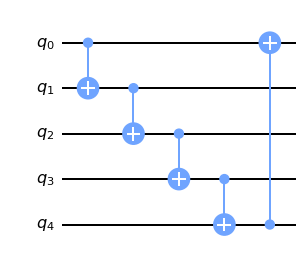

The final goal is to be able to provide a linear algebraic equation that exactly simulates the result of the unitary of an 
arbitary sized CNOT Ring and confirm this by using a Qiskit circuit model simulation.

Python natively supports complex number manipulation as well as unicode variables which could be used to make your code 
align more closely to the standard mathematical notation. Below shows some standard complex manipulation. Recall

$$r = |w| = u + jv =\sqrt{u^2+v^2}.$$
and $$z = r e^{j \varphi}$$
and $$\varphi = \arg (x+jy) = \begin{cases}
   2 \arctan\left(\dfrac{y}{\sqrt{x^2 + y^2} + x}\right) &\text{if } x > 0 \text{ or } y \neq 0, \\
   \pi &\text{if } x < 0 \text{ and } y = 0, \\
   \text{undefined} &\text{if } x = 0 \text{ and } y = 0.
 \end{cases}$$

In [2]:
# Importing standard Python libraries
import numpy as np
import math
# A suggested library for the linear algebra task
from functools import reduce
# For purposes of visualisation in this specific lab
np.set_printoptions(precision=2, suppress=True)

In [3]:
# Complex numbers
w = 2.3 + 5.1j
print(f'w = {w}')
print(f'|2.3+5.1j| = {np.round(abs(w), 2)}')

r = abs(w)
φ = np.arctan2(w.imag, w.real)
z = r*np.exp(1j*φ)
z

w = (2.3+5.1j)
|2.3+5.1j| = 5.59


(2.3+5.1j)

Common matrix and vector algebra for quantum gates are also easily defined consider:

$$HH^{\dagger }=I$$

and

$$\bigotimes_1^2 H = H \otimes H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix}$$

and

$$\bigotimes_1^2 H |00\rangle = \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \end{bmatrix} = \frac{1}{2} |00\rangle + \frac{1}{2} |01\rangle +\frac{1}{2} |10\rangle +\frac{1}{2} |11\rangle = \frac{|00\rangle + |01\rangle + |10\rangle + |11\rangle}{2}$$
    


In [4]:
H = 1/math.sqrt(2)*np.array([[1, 1], [1, -1]])
print(f'HH† = |H><H| = \n{H @ H.T.conj()}\n')

H2 = np.kron(H, H)
print(f'H⊗H = \n{H2}\n')

e1 = np.array([1, 0])
ket00 = np.kron(e1, e1)
print(f'H|00> = \n{H2@ket00}\n')

HH† = |H><H| = 
[[ 1. -0.]
 [-0.  1.]]

H⊗H = 
[[ 0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]

H|00> = 
[0.5 0.5 0.5 0.5]



Idiomatic python usually has flatter and more terse code blocks than for C++

```cpp
std::vector<int> first_three_multiples(int num)
{
    unsigned short n_elems = 3;
    std::vector<int> v;
    for (int i = 0; i < n_elems; i++)
    {
        v.push_back((i+1)*num);
    }
    return v;
}
```

The above may for example be written as

```python
_ = lambda num:[num*_ for _ in (1,2,3)]
_(6)
```
[6, 12, 18]

Think of a way to make the linear algebra managable and scalable.
Think of a way to make the comparison between the linear algebra result and the simulated result.

<b>Hint: Think of alternative ways to represent gates to make the algebra easier.</b>

# Deliverables
- A Jupyter lab-report concatenated to the brief
- A function or class that creates the CNOT Ring for 5 and 10 wires
- The linear algebra for the system of 5 and 10 wires
- Document what you are doing in the blocks in markdown as you would with a LaTeX report
- Comment on the approach taken to mathematically represent the circuit
- Comment on the comparison of the results
- Your code in the git repository in the Github Organisation

ELEN4022 Laboratory Exercise 1 — 2021 — Version 1.0

# UNITARY SIMULATOR FOR CNOT RING

In [5]:
from qiskit_textbook.tools import array_to_latex

Commonly Used Unitary Matrices:

In [6]:
I = np.identity(2, dtype = float)
array_to_latex(I, pretext="\\text{Second Order Identity = } ")

<IPython.core.display.Math object>

In [7]:
X = [[0, 1],
     [1, 0]]
array_to_latex(X, pretext="\\text{X Gate = } ")

<IPython.core.display.Math object>

In [8]:
Cx = [[1.0, 0.0, 0.0, 0.0],
      [0.0, 0.0, 0.0, 1.0],
      [0.0, 0.0, 1.0, 0.0],
      [0.0, 1.0, 0.0, 0.0]]
array_to_latex(Cx, pretext="\\text{CNOT Gate = } ")

<IPython.core.display.Math object>

(**NOTE** the CNOT gate is different to the standard form as Qiskit's convention for Most and Least Signficant bit is the opposite of the widely held convention)

# METHOD
Unitary Calculations for Quantum circuits follow a standard method:

Each wire-adjacent componenent is grouped together in a "<em>sector<em>" as in the circuit below


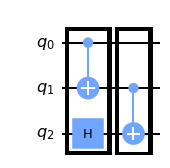
<br>
<div align="center">Figure 1 Circuit Divided by Sectors</div>

The resultant Matrix for each sector is then calculated by performing the Kronecker product on each component's unitary matrix representation

The standard method performs the calculation starting at the topmost component and ending at the bottom component **however** due to Qiskit's Least and Most Significant convention the opposite applies


## Figure 1 Example Calculations


### Sector 1

$$H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$ <br>
<div align="center">The Hadamard Gate </div> <br>

and

$$C = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{bmatrix}$$
<br><div align="center">CNOT Gate</div>

Kronecker product:


$$ 
H \otimes C = 
\begin{bmatrix}
\tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0  \\
0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0  \\
0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0  \\
\tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0 & 0 & 0  \\
0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0  \\
0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0 & 0  \\
\end{bmatrix}
$$

<div align="center">Matrix A</div>



### Sector 2
<br>
$$C = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0\end{bmatrix}$$
<br><div align="center">CNOT Gate</div>

and for when there is no component: 

<br>$$\text{I$_{2}$= } \begin{bmatrix}
1 & 0  \\
0 & 1  \\
\end{bmatrix}$$
<br><div align="center">Second Order Identity Matrix</div>

Kronecker product:
$$ C \otimes  \text{I$_{2}$} =  \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0  \\
\end{bmatrix}$$
<div align="center">Matrix B</div>

### Unitary Representation of Total System
 <br>
$$BA = \begin{bmatrix}
\tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0  \\
0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0  \\
0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0  \\
\tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0 & 0 & 0  \\
0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0  \\
0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0 & 0  \\
\end{bmatrix} \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0  \\
\end{bmatrix}
$$

<br>

$$BA = \begin{bmatrix}
 \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0  \\
0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0  \\
0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0 & 0  \\
\tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}} & 0 & 0 & 0  \\
0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & -\tfrac{1}{\sqrt{2}}  \\
0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0  \\
0 & \tfrac{1}{\sqrt{2}} & 0 & 0 & 0 & \tfrac{1}{\sqrt{2}} & 0 & 0  \\
\end{bmatrix}$$

<br>

## "<em>UPSIDE DOWN<em>" CNOT gates
<br>
These CNOT gates refer to when the Control Bit of the CNOT gate is below the Target Bit


Due to Qiskit's Least and Most Significant Bit Convention the standard CNOT matrix can be used

<br>
$$C = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0\end{bmatrix}$$
    
<br>

For the purposed of the lab, this is only significant as the standard formula for a CNOT gate whose control bit is n bits separated from it's target bit applies to the <em>upside down<em> CNOT gate in the CNOT ring 

## Control Gate of n Bits of Separation
The Unitary matrix formula for CNOT gates of **n** bits of separation:

<br>
$$\begin{bmatrix} \text{I$_{N/2}$} & \text{O$_{N/2}$}\\ \text{O$_{N/2}$} & \text{I$_{N/4}$} \otimes X \end{bmatrix}$$

where

<div align="center">N = $2^{n+1}$</div>

and 

$$\text{X = } \begin{bmatrix}
0 & 1  \\
1 & 0  \\
\end{bmatrix}$$
<br>
<div align="center"> The X Gate </div>

## Example

In Figure 1 we have an <em> upside down <em> Control Gate separated by 2 bits<br><br>


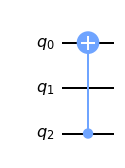
<br>
<div align="center">Figure 2 Control Gate of 2 Bits of Separation</div>

<br>
    using the standard formula
$$n = 2$$
and
    $$N = 2^{2+1} = 8$$
therefore
    <br>
$$\text{ the system unitary matrix} = \begin{bmatrix} \text{I$_{4}$} & \text{O$_{4}$}\\ \text{O$_{4}$} & \text{I$_{2}$} \otimes X \end{bmatrix}$$
    resulting in
    
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0  \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1  \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0  \\
\end{bmatrix}$$

These Methods will be used to generate the Unitary Matrix representation for 5 and 10 bit CNOT rings 

## SIMULATOR

In [9]:
usim = Aer.get_backend('unitary_simulator')

Basic Entangler Function for Comparison

In [10]:
def BasicEntangler(circ):
    no_wires = len(circ.qubits) - 1
    if no_wires > 1:
        for i in range(no_wires):
            circ.cx(i, i+1)
        circ.cx(no_wires,0)

CNOT Gate Seperated by n bits Function

In [11]:
def Cx_Sep(n):
    N = 2**(n+1)
    temp1 = np.identity(int(N/2), dtype = float)
    temp1 = np.vstack((temp1,np.zeros([int(N/2), int(N/2)])))
    temp2 = np.zeros([int(N/2), int(N/2)])
    temp2 = np.vstack((temp2, np.kron(np.identity(int(N/4), dtype = float), X)))
    T = np.hstack((temp1,temp2))
    return T

### 5 Qubit CNOT Ring

In [12]:
no_wires = 5
ring = QuantumCircuit(no_wires)
BasicEntangler(ring)

5 qubit CNOT Ring Circuit 

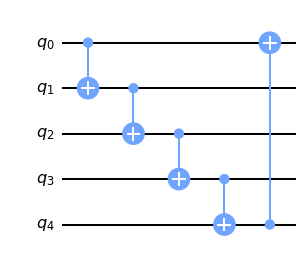

In [13]:
ring.draw('mpl', True)

UNITARY MATRIX FOR TOTAL SYSTEM

In [14]:
qobj = assemble(ring)
R = usim.run(qobj).result().get_unitary()

### UNITARY MATRIX CALCULATIONS FOR EACH "SECTOR"

#### Sector 1

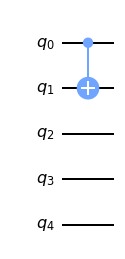

In [15]:
section1 = QuantumCircuit(5)
section1.cx(0,1)
qobj = assemble(section1)
A = usim.run(qobj).result().get_unitary()

section1.draw('mpl',True)

In [16]:
A2 = np.kron(I, I)
A2 = np.kron(A2, I)
A2 = np.kron(A2, Cx)
if np.array_equal(A, A2) == True: print("resultant matrix = simulated matrix for sector")

resultant matrix = simulated matrix for sector


#### Sector 2

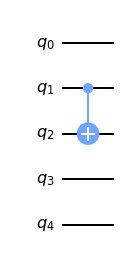

In [17]:
section2 = QuantumCircuit(5)
section2.cx(1,2)
qobj = assemble(section2)
B = usim.run(qobj).result().get_unitary()
section2.draw('mpl',True)

In [18]:
B2 = np.kron(I, I)
B2 = np.kron(B2, Cx)
B2 = np.kron(B2, I)
if np.array_equal(B, B2) == True: print("resultant matrix = simulated matrix for sector")

resultant matrix = simulated matrix for sector


#### Sector 3

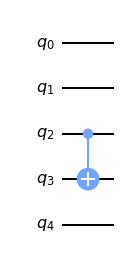

In [19]:
section3 = QuantumCircuit(5)
section3.cx(2,3)
qobj = assemble(section3)
C = usim.run(qobj).result().get_unitary()
section3.draw('mpl',True)

In [20]:
C2 = np.kron(I, Cx)
C2 = np.kron(C2, I)
C2 = np.kron(C2, I)
if np.array_equal(C, C2) == True: print("resultant matrix = simulated matrix for sector")

resultant matrix = simulated matrix for sector


#### Sector 4

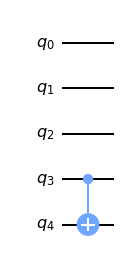

In [21]:
section4 = QuantumCircuit(5)
section4.cx(3,4)
qobj = assemble(section4)
D = usim.run(qobj).result().get_unitary()
section4.draw('mpl',True)

In [22]:
D2 = np.kron(Cx, I)
D2 = np.kron(D2, I)
D2 = np.kron(D2, I)
if np.array_equal(D, D2) == True: print("resultant matrix = simulated matrix for sector")

resultant matrix = simulated matrix for sector


#### Sector 5

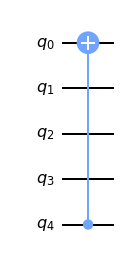

In [23]:
section5 = QuantumCircuit(5)
section5.cx(4,0)
qobj = assemble(section5)
E = usim.run(qobj).result().get_unitary()
section5.draw('mpl',True)

In [24]:
E2 = Cx_Sep(4);
if np.array_equal(E2, E) == True: print("resultant matrix = simulated matrix for sector")

resultant matrix = simulated matrix for sector


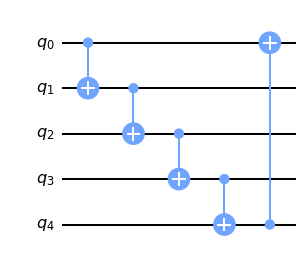

In [25]:
circ = section1.compose(section2.compose(section3.compose(section4.compose(section5))))
circ.draw('mpl', True)

#### Resultant System Matrix Comparison

In [26]:

if np.array_equal(E2@D2@C2@B2@A2, R) == True: print("resultant matrix = simulated matrix")

resultant matrix = simulated matrix


### 10 Qubit CNOT Ring
For this section the sector seperation will be condensed for readability - as it follows the same method as in the 5 Qubit CNOT Ring Simulation

In [27]:
no_wires = 10
ring = QuantumCircuit(no_wires)
BasicEntangler(ring)

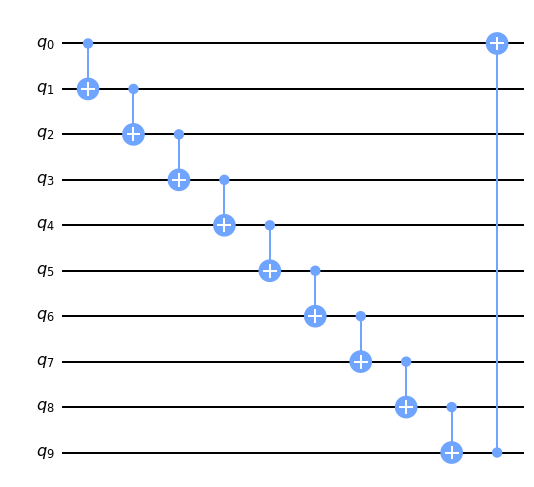

In [28]:
ring.draw('mpl', True)

UNITARY MATRIX FOR TOTAL SYSTEM

In [29]:
qobj = assemble(ring)
R = usim.run(qobj).result().get_unitary()

#### Sector 1

In [30]:
A = np.kron(I, I)
for i in range(6):
    A = np.kron(A, I)
A = np.kron(A, Cx)

#### Sector 2

In [31]:
B = np.kron(I, I)
for i in range(5):
    B = np.kron(B, I)
B = np.kron(B, Cx)
B = np.kron(B, I)

#### Sector 3

In [32]:
C = np.kron(I, I)
for i in range(4):
    C = np.kron(C, I)
C = np.kron(C, Cx)
C = np.kron(C, I)
C = np.kron(C, I)

#### Sector 4

In [33]:
D = np.kron(I, I)
for i in range(3):
    D = np.kron(D, I)
D = np.kron(D, Cx)
for i in range(3):
    D = np.kron(D, I)

#### Sector 5

In [34]:
E = np.kron(I, I)
for i in range(2):
    E = np.kron(E, I)
E = np.kron(E, Cx)
for i in range(4):
    E = np.kron(E, I)

#### Sector 6

In [35]:
F = np.kron(I, I)
F = np.kron(F, I)
F = np.kron(F, Cx)
for i in range(5):
    F = np.kron(F, I)

#### Sector 7

In [36]:
G = np.kron(I, I)
G = np.kron(G, Cx)
for i in range(6):
    G = np.kron(G, I)

#### Sector 8

In [37]:
H = np.kron(I, Cx)
for i in range(7):
    H = np.kron(H, I)

#### Sector 9

In [38]:
J = Cx
for i in range(8):
    J = np.kron(J, I)

#### Sector 10

In [39]:
K = Cx_Sep(9)

#### Resultant System Matrix Comparison

In [40]:
if np.array_equal(K@J@H@G@F@E@D@C@B@A, R) == True: print("resultant matrix = simulated matrix")

resultant matrix = simulated matrix
